In [155]:
# Загружаем данные по олимпийским играм 

'''
Data fields
acoustic_data - the seismic signal [int16]
time_to_failure - the time (in seconds) until the next laboratory earthquake [float64]
seg_id - the test segment ids for which predictions should be made (one prediction per segment)

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

'''

'\nData fields\nacoustic_data - the seismic signal [int16]\ntime_to_failure - the time (in seconds) until the next laboratory earthquake [float64]\nseg_id - the test segment ids for which predictions should be made (one prediction per segment)\n\nhttps://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results\n\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("athlete_events.csv") 

In [4]:
regions = pd.read_csv("noc_regions.csv") 

In [5]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [12]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [19]:
# Посмотрим какие дисциплины в Sailing соревнованиях

df = merged[(merged.Sport == 'Sailing')]
df.Event.unique()

array(["Sailing Women's Windsurfer",
       'Sailing Mixed Three Person Keelboat',
       "Sailing Men's Two Person Dinghy", 'Sailing Mixed 8 metres',
       'Sailing Mixed Two Person Heavyweight Dinghy',
       "Sailing Women's Three Person Keelboat", 'Sailing Mixed 7 metres',
       "Sailing Men's One Person Dinghy", 'Sailing Mixed 6 metres',
       'Sailing Mixed One Person Dinghy',
       'Sailing Mixed Two Person Keelboat', "Sailing Men's Windsurfer",
       "Sailing Women's Two Person Dinghy", "Sailing Women's Skiff",
       "Sailing Women's One Person Dinghy", 'Sailing Mixed 5.5 metres',
       "Sailing Men's One Person Heavyweight Dinghy",
       'Sailing Mixed Windsurfer', 'Sailing Mixed Open',
       'Sailing Mixed 1-2 Ton', 'Sailing Mixed Multihull',
       'Sailing Mixed 12 metres', 'Sailing Mixed Two Person Dinghy',
       'Sailing Mixed 40 metres', 'Sailing Mixed Skiff',
       "Sailing Men's Skiff", 'Sailing Mixed 10 metres',
       "Sailing Men's Two Person Keelboat", '

In [20]:
# Выделим топ 10 по количеству золотых медалей 
df.groupby('Event')[['Medal']].count().sort_values('Medal', ascending=False).head(10).style.bar()

,Medal
Event,
Sailing Mixed Three Person Keelboat,136
Sailing Mixed 8 metres,118
Sailing Mixed 6 metres,114
Sailing Mixed Two Person Keelboat,108
Sailing Mixed 12 metres,65
Sailing Mixed Two Person Heavyweight Dinghy,61
Sailing Mixed Multihull,60
Sailing Mixed One Person Dinghy,57
Sailing Women's Two Person Dinghy,48


In [21]:
# Возьмем первую категорию для анализа 

df1 = merged[(merged.Event == "Sailing Mixed Three Person Keelboat")]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 89 to 270578
Data columns (total 17 columns):
ID        927 non-null int64
Name      927 non-null object
Sex       927 non-null object
Age       906 non-null float64
Height    770 non-null float64
Weight    765 non-null float64
Team      927 non-null object
NOC       927 non-null object
Games     927 non-null object
Year      927 non-null int64
Season    927 non-null object
City      927 non-null object
Sport     927 non-null object
Event     927 non-null object
Medal     136 non-null object
region    920 non-null object
notes     15 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 130.4+ KB


### Оценим распределение золотых медалей в 'Sailing Mixed Three Person Keelboat'

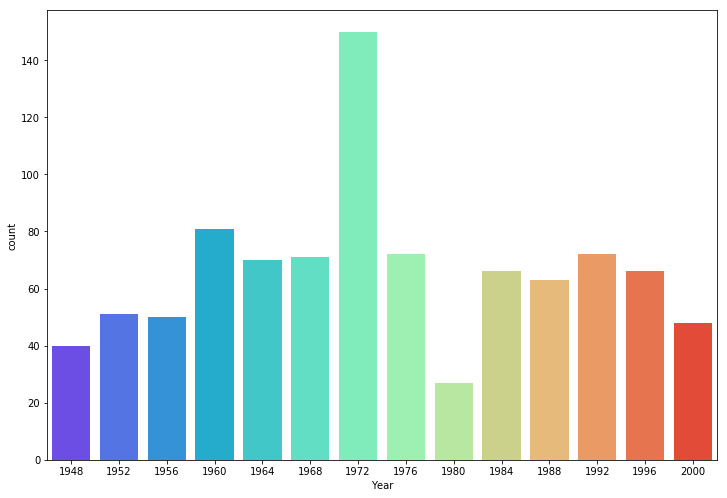

In [112]:
# Посмотрим распределение количества участников по годам

fig, ax = plt.subplots()
fig.set_size_inches(12, 8.27)

sns.countplot(x='Year',data=df1 ,palette='rainbow') 

In [28]:
# Выделим данные по тем, кто и выиграл и не виыграл медали 

noMedals = df1.loc[pd.isnull(df1.Medal)] # участники без медалей 
goldMedals = df1[(df1.Medal == 'Gold')] # участники с золотой медалью 

In [76]:
# Посмотрим какие страны выиграли золото

goldMedals.groupby('region')[['Medal']].count().sort_values('Medal', ascending=False)

,Medal
region,
Denmark,15
USA,9
Germany,6
Norway,6
Australia,3
Greece,3
Sweden,3


In [ ]:
# Интересно сравнить количество успешных и неуспешных попыток выиграть золотую медаль

Text(0.5, 1.0, 'Распределение золотых медалей и количества участников по странам')

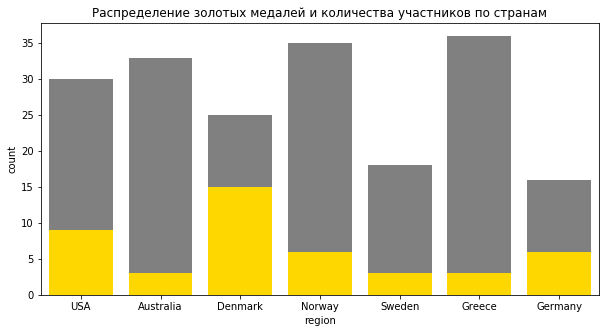

In [119]:
#Список стран, которые получили золотые медали 
l = [x for x in goldMedals['region'].unique()]
# Данные о количестве неудачные попыток стран, которые выиграли золото
nomedal_g = noMedals [noMedals ['region'].isin(l)]

plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.countplot(nomedal_g["region"], color = "grey")
sns.countplot(goldMedals['region'], color="gold" , saturation = 1)
plt.title('Распределение золотых медалей и количества участников по странам') # а что греция?  

In [147]:
# Оценим шанс выиграть золотую медаль для каждой страны 

h = {}
for i in l:
    a = len(goldMedals.loc[goldMedals['region'] == i])
    b = len(df1.loc[df1['region'] == i])
    c = a/b
    d = np.log(c/(1-c))
    h[i] = np.exp(d)

ss = pd.DataFrame.from_dict(h, orient='index')
ss.columns = ['p']
print (ss)

                  p
USA        0.264706
Australia  0.083333
Denmark    0.500000
Norway     0.181818
Sweden     0.066667
Greece     0.107143
Germany    0.117647


Text(0.5, 1.0, 'Шанс выиграть золото на олимпийских играх среди топ участников')

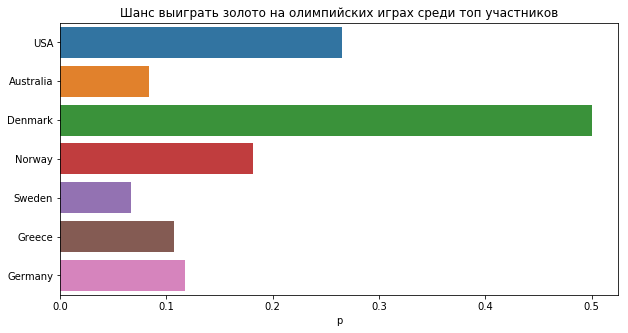

In [154]:
plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.barplot(y=ss.index, x=ss.p)
plt.title('Шанс выиграть золото на олимпийских играх среди топ участников')

In [156]:
"""
Резюме. Несмотря на меньшее количество попыток выиграть олимпийское золото, вероятность выиграша у Дании выше всех

"""

'\nРезюме. Несмотря на меньшее количество попыток выиграть олимпийское золото, вероятность выиграша у Дании выше всех\n\n'